# Bank Note - <font color='red'>**REAL**</font> or <font color='green'>**FAKE**</font>?

#### Imports

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score
import os
os.chdir('c:/users/nicolas/documents/data/bank-note-dataset')

#### Loading the data

In [19]:
df = pd.read_csv('BankNote_Authentication.csv')

#### Inspecting the data

In [20]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [21]:
rows, columns = df.shape
print(f'We have {rows} rows and {columns} columns.')

We have 1372 rows and 5 columns.


In [22]:
print(f'We have {int(df["class"].sum()/rows*100)}% of samples in the positive class.')

We have 44% of samples in the positive class.


#### Visualization

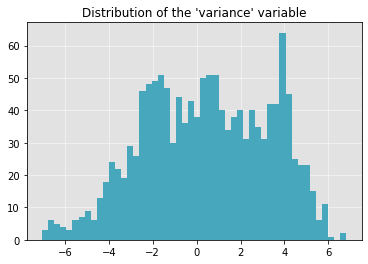

In [23]:
fig, ax = plt.subplots()
_=ax.hist(df['variance'], bins=50, color='#47A8BD')
_=ax.set_facecolor('#E2E2E2')
_=ax.set_axisbelow(True)
_=plt.grid(True, color='white', alpha=.6)
_=plt.title("Distribution of the 'variance' variable")

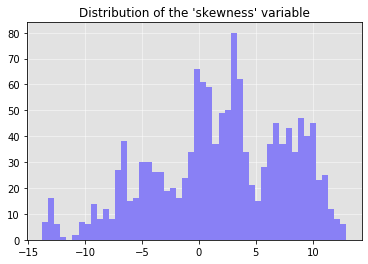

In [29]:
fig, ax = plt.subplots()
_=ax.hist(df['skewness'], bins=50, color='#8980F5')
_=ax.set_facecolor('#E2E2E2')
_=ax.set_axisbelow(True)
_=plt.grid(True, color='white', alpha=.6)
_=plt.title("Distribution of the 'skewness' variable")

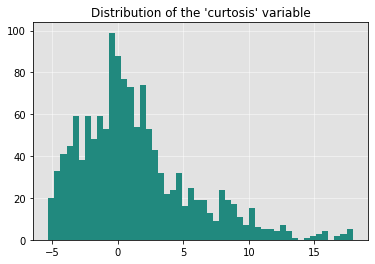

In [30]:
fig, ax = plt.subplots()
_=ax.hist(df['curtosis'], bins=50, color='#21897E')
_=ax.set_facecolor('#E2E2E2')
_=ax.set_axisbelow(True)
_=plt.grid(True, color='white', alpha=.6)
_=plt.title("Distribution of the 'curtosis' variable")

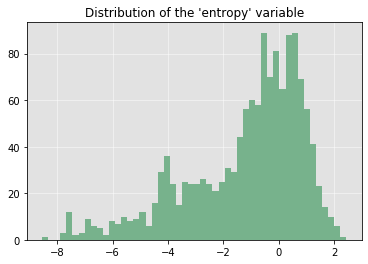

In [32]:
fig, ax = plt.subplots()
_=ax.hist(df['entropy'], bins=50, color='#77B28C')
_=ax.set_facecolor('#E2E2E2')
_=ax.set_axisbelow(True)
_=plt.grid(True, color='white', alpha=.6)
_=plt.title("Distribution of the 'entropy' variable")

#### Cross-validation

In [34]:
x = df.drop('class', axis=1).values
y = df['class'].values

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=2e-1)

#### 1. Gaussian Naive Bayes

In [36]:
nb = GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
ypred = nb.predict(xtest)
nb_acc = accuracy_score(ytest, ypred)
nb_recall = recall_score(ytest, ypred)
print(f'We have an accuracy of {np.round(nb_acc*100, 2)}% and a recall score '\
      f'of {np.round(nb_recall*100, 2)}%.')

We have an accuracy of 79.27% and a recall score of 71.2%.


#### 2. Logistic Regression

In [38]:
lgt = LogisticRegression(solver='lbfgs')
lgt.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
ypred = lgt.predict(xtest)
lgt_acc = accuracy_score(ytest, ypred)
lgt_recall = recall_score(ytest, ypred)
print(f'We have an accuracy of {np.round(lgt_acc*100, 2)}% and a recall score '\
      f'of {np.round(lgt_recall*100, 2)}%.')

We have an accuracy of 99.27% and a recall score of 99.2%.


#### 3. Support Vector Machine

In [40]:
svc = SVC(gamma='scale')
svc.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
ypred = svc.predict(xtest)
svc_acc = accuracy_score(ytest, ypred)
svc_recall = recall_score(ytest, ypred)
print(f'We have an accuracy of {np.round(svc_acc*100, 2)}% and a recall score '\
      f'of {np.round(svc_recall*100, 2)}%.')

We have an accuracy of 100.0% and a recall score of 100.0%.


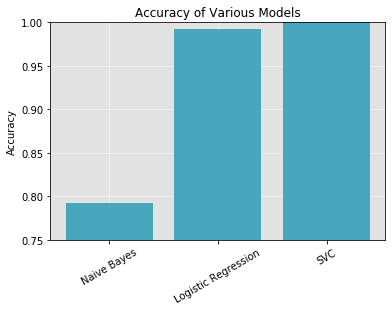

In [66]:
fig, ax = plt.subplots()
_=ax.bar(['Naive Bayes', 'Logistic Regression', 'SVC'], [nb_acc, lgt_acc, svc_acc], color='#47A8BD')
_=plt.ylim(.75, 1.)
_=ax.set_facecolor('#E2E2E2')
_=ax.set_axisbelow(True)
_=plt.grid(True, color='white', alpha=.6)
_=plt.xticks(rotation=30)
_=plt.ylabel('Accuracy')
_=plt.title('Accuracy of Various Models')